# Magnetic Fields
## Line Current

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

I = 1
line_length = 2
μ04pi = 1
L = 5
N = 20

x, y, z = [np.linspace(-L, L, N) for i in range(3)]
rx, ry, rz = np.meshgrid(x,y,z)
Bx, By, Bz = np.zeros((3,N,N,N))


def Bfield_line(r, line_length, I, N):
    B = np.zeros(3)
    line_segment = line_length/N
    dl = line_segment * np.array([1, 0.0, 0.0])
    for i in range(N):
        di = np.array([-line_length/2 + line_segment*i, 0.0, 0.0])
        R = r - di
        R_norm = np.linalg.norm(R)
        B += μ04pi* I/R_norm**3 * np.cross(dl, R)
    
    return B

In [2]:
for i in range(0,N**3):
    r = np.array([rx.flat[i], ry.flat[i], rz.flat[i]])
    Bx.flat[i], By.flat[i], Bz.flat[i] = Bfield_line(r, line_length, I, 10)

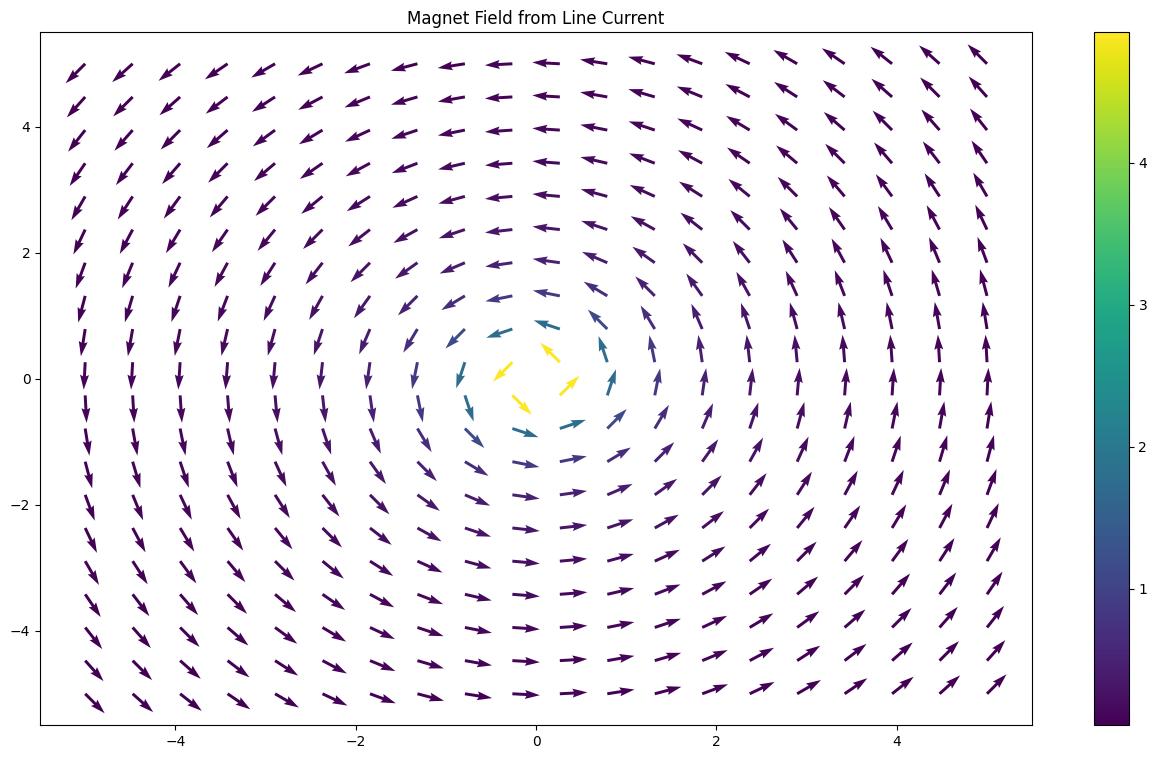

In [3]:
index = int(N/2)
Bmag = np.sqrt(By[:,index,:]**2 + Bz[:,index,:]**2)
uBy = By[:,index,:]/Bmag
uBz = Bz[:,index,:]/Bmag
Bcolor = Bmag

plt.figure(figsize =(16,9))
plt.quiver(ry[:,index,:], rz[:,index,:], uBy, uBz, Bcolor)
plt.title('Magnet Field from Line Current')
plt.colorbar()

## Circular Wire

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

I = 5
rad = 5
L = 8
N = 40

x, z = [np.linspace(-L, L, N) for i in range(2)]
rx, rz = np.meshgrid(x, z)
Bx, Bz = np.zeros((2,N,N))

def BfieldCircle(r, rad, I, N):
    dθ = 2*np.pi/N 
    dl = rad*2*np.pi/N
    B = np.zeros(3)
    for i in range(N):
        current_pos = rad*np.array([np.cos(dθ*i), np.sin(dθ*i), 0])
        Idl         = I*dl*np.array([-np.sin(dθ*i), np.cos(dθ*i), 0])
        R           = r - current_pos
        R_norm      = np.linalg.norm(R)
        B          += np.cross(Idl, R)/R_norm**3
    return B

In [5]:
for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], 0, rz.flat[i]])
    Bx.flat[i], By, Bz.flat[i] = BfieldCircle(r, rad, I, 20)

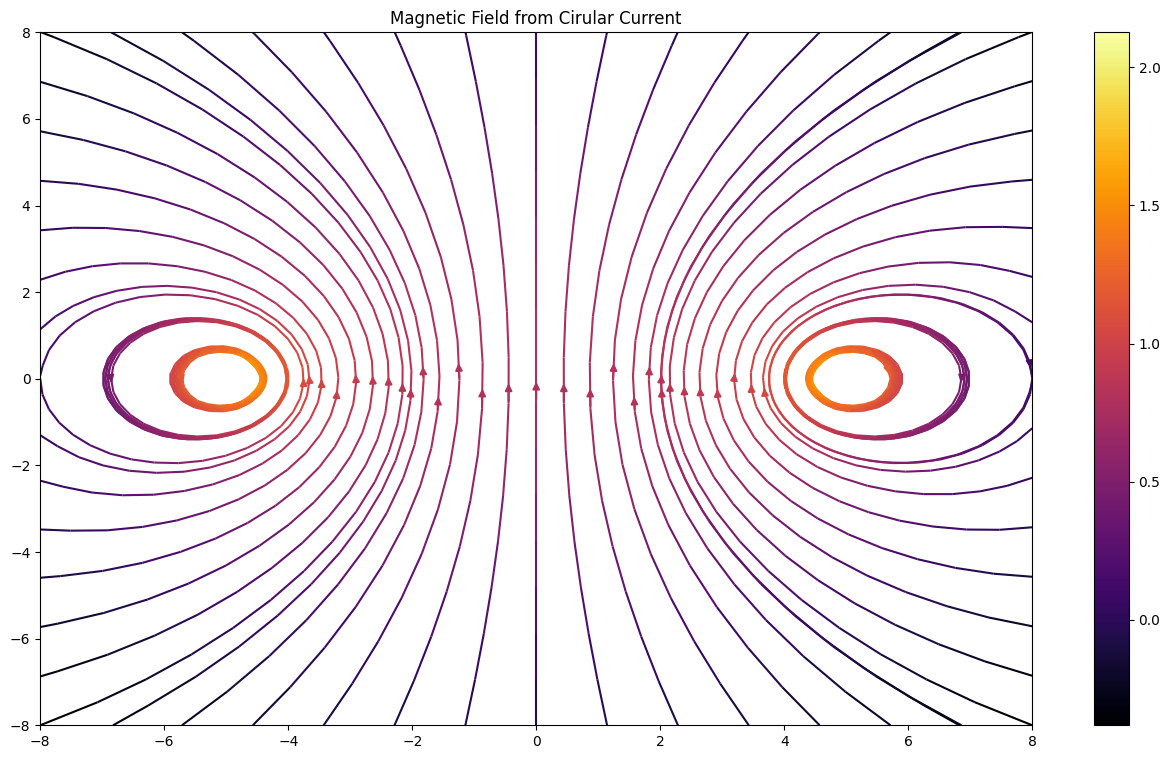

In [6]:
Bmag = np.sqrt(Bx**2 + Bz**2)
uBx = Bx/Bmag
uBz = Bz/Bmag
Bcolor = np.log10(Bmag)

plt.figure(figsize=(16,9))
plt.streamplot(rx, rz, Bx, Bz, broken_streamlines=False, color = Bcolor, cmap = 'inferno', density=.5)
plt.title('Magnetic Field from Cirular Current')
plt.colorbar()